In [1]:
# Import des datas

import pandas as pd
raw_data = pd.read_csv('Ressources' + '/' + 'dataCancer.csv')

In [2]:
# Separation des datas dans nos sets pour l'entrainement

X_train = raw_data.iloc[:60,1:-3]
y_train = raw_data.iloc[:60,-2]
X_test = raw_data.iloc[60:,1:-3]
y_test = raw_data.iloc[60:,-2]

In [3]:
from sklearn import linear_model
import numpy as np

# On crée un modèle de régression linéaire
lr = linear_model.LinearRegression()

# On entraîne ce modèle sur les données d'entrainement
lr.fit(X_train,y_train)

# On récupère l'erreur de norme 2 sur le jeu de données test comme baseline
baseline_error = np.mean((lr.predict(X_test) - y_test) ** 2)

print("L'erreur quadratique de ce modele est : %s" %(baseline_error))

L'erreur quadratique de ce modele est : 2.8641499657014458


### Technique de Ridge Regression

In [4]:
# Creation de plusieurs coefficients correctifs

n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)

In [5]:
# Test de ridge regression avec les differents coefficients

from sklearn.linear_model import Ridge
ridge = linear_model.Ridge()

coefs = []
errors = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    errors.append([baseline_error, np.mean((ridge.predict(X_test) - y_test) ** 2)])

In [16]:
np.shape(coefs)

(200, 7)

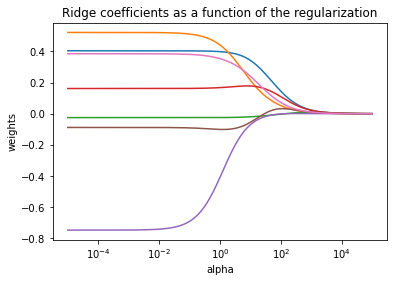

In [6]:
# Effets des coefficients sur la regularisation

import matplotlib.pyplot as plt

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

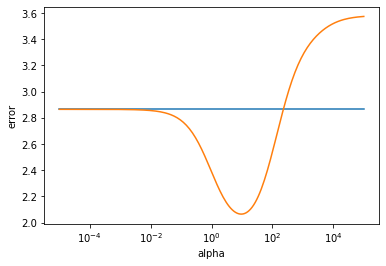

In [9]:
# Effet du coefficient sur l'erreur quadratique

ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

In [10]:
# Recuperation de la valeur de l'erreur minimum

min(errors)

[2.8641499657014458, 2.064827060795022]

Pour effectuer une cross validation de la régression ridge, vous pouvez utiliser la fonction **sklearn.linear_model.RidgeCV** qui effectue une recherche automatique des hyperparamètres. J'ai ici effectué une recherche manuelle pour le TP.

### Technique du lasso

In [11]:
# Test de plusieurs parametres du lasso

n_alphas = 300
alphas = np.logspace(-5, 1, n_alphas)
lasso = linear_model.Lasso(fit_intercept=False)

coefs = []
errors = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    errors.append([baseline_error, np.mean((lasso.predict(X_test) - y_test) ** 2)])

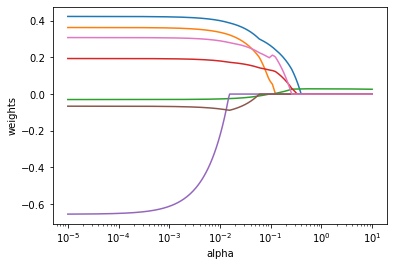

In [12]:
# Effets des coefficients sur la regularisation

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

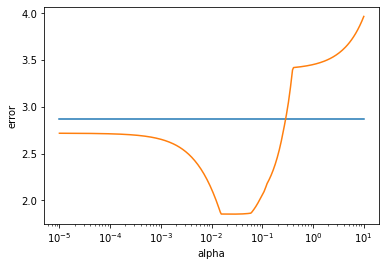

In [13]:
# Effet du coefficient sur l'erreur quadratique

ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

In [14]:
# Recuperation de la valeur de l'erreur minimum

min(errors)

[2.8641499657014458, 1.8531561201728328]

De même, la fonction **sklearn.linear_model.LassoCV** permet d'effectuer une recherche des hyperparamètres de manière automatisée